
## Исследование популярного сервиса аренды самокатов GoFast

В нашем расположение данные о некоторых пользователях из нескольких городов, а также об их поездках.

Пользователи делятся на пользователей с подпиской и без.

### Цель исследования

Рассчитать выручку пользователей с подпиской и без подписки

Проверить несколько гипотез и сделать выводы

#### Ход исследования
Данные получим из 3 датасетов Пользователи — users_go.csv, Поездки — rides_go.csv, Подписки — subscriptions_go.csv
О качестве данных ничего не известно поэтому перед тем как приступить к целям исследования нужен обзор данных.

Я проверю данные на ошибки и если они есть оценю их влияние на исследование. Затем приступим к предобработке и попробуем исправить их, которые не приведут к искажению конечных результатов. Далее создадим нужные нам таблицы объединением их в одну
и приступим к проведению исследовательского анализа.
Подсчитаем выручку для различных пользователей

После  перейдем к статистическому анализу для проверки гипотез. Затем сделаем выводы по ним.
Таким образом моё исследование пройдет в 6 этапов
Оброз данных

Преобработка данных

Объединение таблиц 

Подсчет выручки

Проверка гипотез 

Написание выводов по полученым результатам

Написание общего вывода


## Исследование 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Загрузим данные

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

#### 1.1 Посмотрим общую информацию
Сначала users и т.д


In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


#### Шаг 2. Предобработка данных

#### Проверим на дубликаты и общее число строк

In [4]:
users.shape[0]

1565

In [5]:
users['user_id'].count()

1565

In [6]:
users.duplicated().sum()

31

In [7]:
duplicate_values = users[users.duplicated(keep='first')]
duplicate_values

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Найден 31 дубликат, проверим на типы данных, попробуем от них избавиться

In [8]:
users = users.drop_duplicates()

Снова проверим на уникальность

In [9]:
print('Число строк', users.shape[0])
print('Число уникальных пользователей', users['user_id'].count())
print('Кол-во дубликатов', users.duplicated().sum())

Число строк 1534
Число уникальных пользователей 1534
Кол-во дубликатов 0


Дубликаты удалены идём дальше

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


C типами все в порядке, проверим оставшиеся датасеты

In [11]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [12]:
print('Число строк', rides.shape[0])
print('Число уникальных пользователей', rides['user_id'].count())
print('Кол-во дубликатов', rides.duplicated().sum())

Число строк 18068
Число уникальных пользователей 18068
Кол-во дубликатов 0


Все строки уникальны, переходим к типам данных

In [13]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Date в datetime, дистанцию в км и два знака после запятой, duration оставим в минутах, но оставим два знака после запятой

In [14]:
rides['date'] = pd.to_datetime(rides['date'])
rides['distance'] = (rides['distance']).round(2)
rides['duration'] = rides['duration'].round(2)
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Замены произведены

In [15]:
rides.head()

,user_id,distance,duration,date
0,1,4409.92,25.60,2021-01-01
1,1,2617.59,15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,2694.78,18.51,2021-08-11
4,1,4028.69,26.27,2021-08-28


Создадим столбец с месяцем

In [16]:
rides['month'] = rides['date'].dt.month_name()
rides['year'] = rides['date'].dt.year
data_2022 = rides.pivot_table(index = 'month', values = 'year')
data_2022

,year
month,
April,2021
August,2021
December,2021
February,2021
January,2021
July,2021
June,2021
March,2021
May,2021


Данные предоставлены за 2021 год.

Переходим к 3 датасету

In [17]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Тут 2 строки оставляем без изменений

In [18]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [19]:
print('Число строк', subscriptions.shape[0])
print('Кол-во дубликатов', subscriptions.duplicated().sum())

Число строк 2
Кол-во дубликатов 0


Пропусков нет, типы данных корректны, дубликатов нет.

In [20]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### Шаг 3. Исследовательский анализ данных

##### Шаг 3.1. частота встречаемости городов

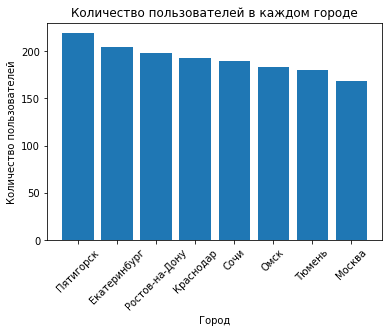

In [21]:
city_counts = users['city'].value_counts()
plt.bar(city_counts.index, city_counts)
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей в каждом городе')
plt.xticks(rotation=45)
plt.show()

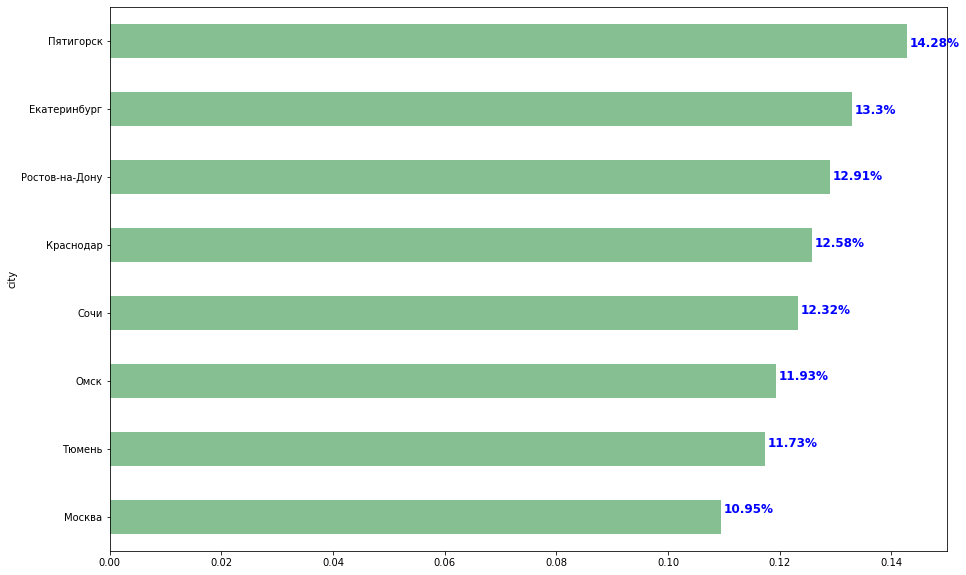

In [22]:
all_users = len(users)
df_for_barh = users.groupby('city').size()/all_users
df_for_barh_filtered = df_for_barh[df_for_barh > 0.015].sort_values()
ax = df_for_barh_filtered.plot(kind='barh', color='#86bf91', figsize=(15,10))

labels = dict(df_for_barh_filtered)
labels

i = 0
for city in labels:
    ax.text(labels[city] + 0.0005, i + 0.05, str(round(labels[city]*100, 2)) + '%', 
            fontsize = 'large', fontweight='bold', color='blue')
    if i < 9.7:
        i += 0.98
    else:
        i += 1.02

В Пятигорске больше всего пользователей, в Москве меньше всего

##### Шаг 3.2. соотношение пользователей с подпиской и без подписки

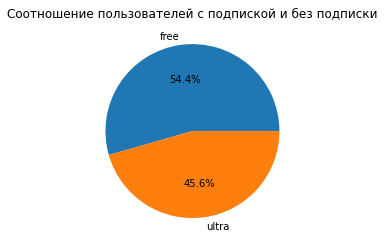

In [23]:
subscription_counts = users['subscription_type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

Соотношение пользователей с подпиской и без подписки. Пользователи с подпиской составляют 45.6 % от общего кол-ва, пользователи без подписки 54.4%

#### Шаг 3.3 возраст пользователей

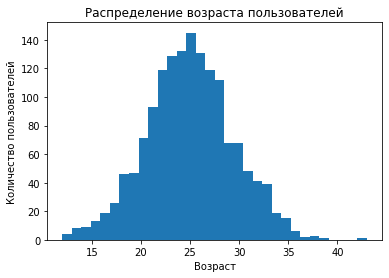

In [24]:
plt.hist(users['age'], bins = 32)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')
plt.show()

На мой взгляд основной диапазон приходится на людей от 20 до 30 лет

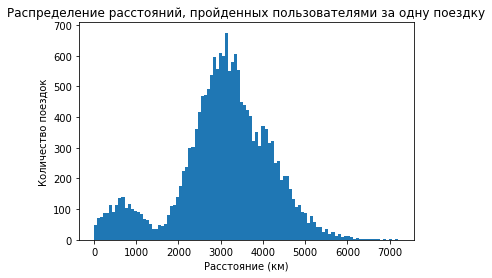

In [25]:
plt.hist(rides['distance'], bins = 100)
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')
plt.title('Распределение расстояний, пройденных пользователями за одну поездку')
plt.show()

Посмотри на промежуток  0  поближе


In [26]:
short_rides = rides[rides['distance'] <= 0]
short_rides.value_counts()

Series([], dtype: int64)

Основная часть поездок занимает от 2500 до 3800 метров. Медиана 3133 метра. Поездки на расстояние более 5 км редки. Однако на гистограмме видно, что некоторая часть пользователей использует самокаты для коротких поездок - до 1500 м.

#### Шаг 3.5 продолжительность поездок

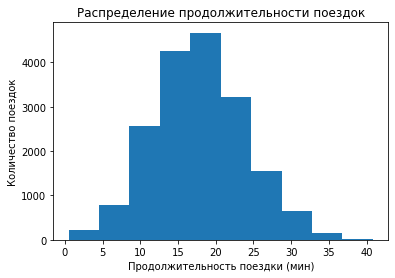

In [27]:
plt.hist(rides['duration'])
plt.xlabel('Продолжительность поездки (мин)')
plt.ylabel('Количество поездок')
plt.title('Распределение продолжительности поездок')
plt.show()

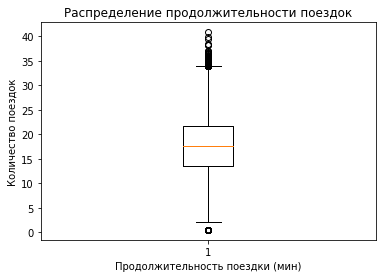

In [28]:
plt.boxplot(rides['duration'])
plt.xlabel('Продолжительность поездки (мин)')
plt.ylabel('Количество поездок')
plt.title('Распределение продолжительности поездок')
plt.show()

В основном люди совершают поездки примерно от 12.5 до 22.5 минут.

В основном люди совершали поездки от 10 до 25 минут

#### Шаг 4. Объединение данных

#### 4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

Проверим размеры объединяемых датасетов.

In [29]:
print('Размер датасета users:', users.shape)
print('Размер датасета rides:', rides.shape)
print('Размер датасета subscriptions:', subscriptions.shape)

Размер датасета users: (1534, 5)
Размер датасета rides: (18068, 6)
Размер датасета subscriptions: (2, 4)


In [30]:
combined_data = pd.merge(users, rides, on='user_id')
combined_data = pd.merge(combined_data, subscriptions, on='subscription_type')
combined_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,January,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,January,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,April,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,August,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,August,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.82,2021-11-04,November,2021,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.41,2021-11-16,November,2021,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.44,2021-11-18,November,2021,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.67,2021-11-27,November,2021,8,50,0


In [31]:
print('Размер объединенного датафрейма:', combined_data.shape)

Размер объединенного датафрейма: (18068, 13)


Размер результирующего датасета коректен.

#### 4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
#### c данными о пользователях без подписки;
#### с данными о пользователях с подпиской.

In [32]:
no_subscription_data = combined_data.query('subscription_type == "free"')
subscription_data = combined_data.query('subscription_type == "ultra"')
subscription_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,January,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,January,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,April,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,August,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,August,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,24.67,2021-08-29,August,2021,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,15.89,2021-09-12,September,2021,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,14.39,2021-09-26,September,2021,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,15.84,2021-10-17,October,2021,6,0,199


In [33]:
no_subscription_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.94,2021-01-02,January,2021,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,February,2021,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.02,2021-02-04,February,2021,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.78,2021-02-10,February,2021,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.43,2021-02-14,February,2021,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.82,2021-11-04,November,2021,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.41,2021-11-16,November,2021,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.44,2021-11-18,November,2021,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.67,2021-11-27,November,2021,8,50,0


In [34]:
subscription_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,January,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,January,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,April,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,August,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,August,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,24.67,2021-08-29,August,2021,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,15.89,2021-09-12,September,2021,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,14.39,2021-09-26,September,2021,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,15.84,2021-10-17,October,2021,6,0,199


#### 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

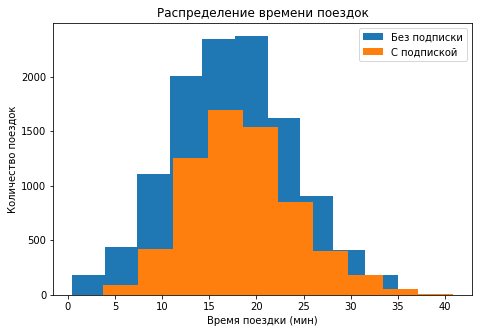

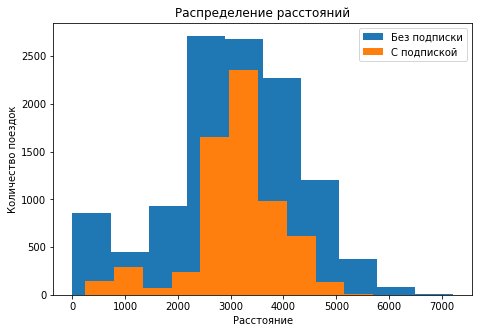

<Figure size 432x288 with 0 Axes>

In [35]:
fig1, ax1 = plt.subplots(figsize=(7.5, 5))
ax1.hist(no_subscription_data['distance'], label='Без подписки', bins = 10)
ax1.hist(subscription_data['distance'], label='С подпиской')
ax1.set_title('Распределение расстояний')
ax1.set_xlabel('Расстояние')
ax1.set_ylabel('Количество поездок')
ax1.legend()

fig2, ax2 = plt.subplots(figsize=(7.5, 5))
ax2.hist(no_subscription_data['duration'], label='Без подписки', bins = 10)
ax2.hist(subscription_data['duration'], label='С подпиской')
ax2.set_title('Распределение времени поездок')
ax2.set_xlabel('Время поездки (мин)')
ax2.set_ylabel('Количество поездок')
ax2.legend()

plt.figure(1)
plt.show()

plt.figure(2)
plt.show()

Статистика для данных без подписки:
Минимум: 0.86
Максимум: 7211.01
Среднее: 3045.495283540802
Медиана: 3114.6499999999996

Статистика для данных с подпиской:
Минимум: 244.21
Максимум: 5699.77
Среднее: 3115.445430769231
Медиана: 3148.6400000000003

Статистика для данных без подписки:
Минимум: 0.5
Максимум: 34.95
Среднее: 17.390899896265562
Медиана: 17.33

Статистика для данных с подпиской:
Минимум: 3.76
Максимум: 40.82
Среднее: 18.542016923076922
Медиана: 18.18


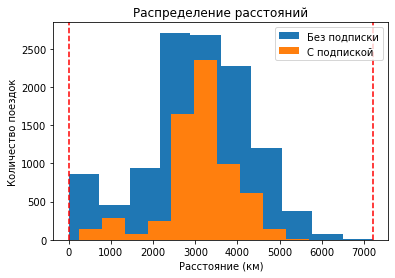

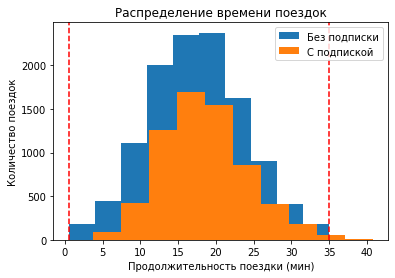

In [36]:
plt.hist(no_subscription_data['distance'], label='Без подписки', bins=10)
plt.hist(subscription_data['distance'], label='С подпиской', bins=10)
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')
plt.title('Распределение расстояний')
plt.legend()

plt.axvline(no_subscription_data['distance'].min(), color='red', linestyle='--')
plt.axvline(no_subscription_data['distance'].max(), color='red', linestyle='--')

print('Статистика для данных без подписки:')
print('Минимум:', no_subscription_data['distance'].min())
print('Максимум:', no_subscription_data['distance'].max())
print('Среднее:', no_subscription_data['distance'].mean())
print('Медиана:', no_subscription_data['distance'].median())

print('\nСтатистика для данных с подпиской:')
print('Минимум:', subscription_data['distance'].min())
print('Максимум:', subscription_data['distance'].max())
print('Среднее:', subscription_data['distance'].mean())
print('Медиана:', subscription_data['distance'].median())

plt.figure()
plt.hist(no_subscription_data['duration'], label='Без подписки', bins=10)
plt.hist(subscription_data['duration'], label='С подпиской', bins=10)
plt.xlabel('Продолжительность поездки (мин)')
plt.ylabel('Количество поездок')
plt.title('Распределение времени поездок')
plt.legend()

plt.axvline(no_subscription_data['duration'].min(), color='red', linestyle='--')
plt.axvline(no_subscription_data['duration'].max(), color='red', linestyle='--')

print('\nСтатистика для данных без подписки:')
print('Минимум:', no_subscription_data['duration'].min())
print('Максимум:', no_subscription_data['duration'].max())
print('Среднее:', no_subscription_data['duration'].mean())
print('Медиана:', no_subscription_data['duration'].median())

print('\nСтатистика для данных с подпиской:')
print('Минимум:', subscription_data['duration'].min())
print('Максимум:', subscription_data['duration'].max())
print('Среднее:', subscription_data['duration'].mean())
print('Медиана:', subscription_data['duration'].median())

plt.show()

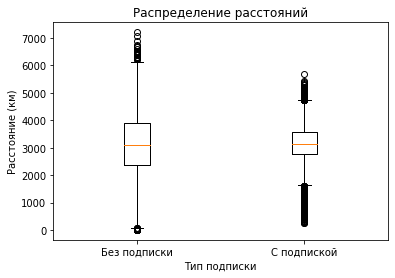

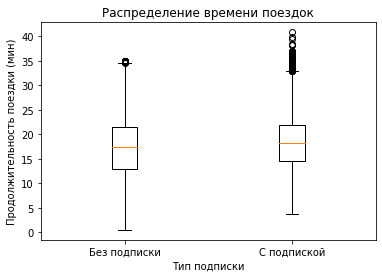

In [37]:
plt.boxplot([no_subscription_data['distance'], subscription_data['distance']], labels=['Без подписки', 'С подпиской'])
plt.xlabel('Тип подписки')
plt.ylabel('Расстояние (км)')
plt.title('Распределение расстояний')

plt.figure()
plt.boxplot([no_subscription_data['duration'], subscription_data['duration']], labels=['Без подписки', 'С подпиской'])
plt.xlabel('Тип подписки')
plt.ylabel('Продолжительность поездки (мин)')
plt.title('Распределение времени поездок')

plt.show()


Статистика для данных без подписки:
Минимум: 0.86
Максимум: 7211.01
Среднее: 3045.495283540802
Медиана: 3114.6499999999996

Статистика для данных с подпиской:
Минимум: 244.21
Максимум: 5699.77
Среднее: 3115.445430769231
Медиана: 3148.6400000000003

Статистика для данных без подписки:
Минимум: 0.5
Максимум: 34.95
Среднее: 17.390899896265562
Медиана: 17.33

Статистика для данных с подпиской:
Минимум: 3.76
Максимум: 40.82
Среднее: 18.542016923076922
Медиана: 18.18
    
Данные имеют нормальное распределение


Кол-во людей с подпиской больше и кол-во поездкок соотвестнно больше
Без подписки люди ездят дольше и дальше

#### Шаг 5. Подсчёт выручки

#### 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [38]:
combined_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,January,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,January,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,April,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,August,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,August,2021,6,0,199


In [39]:
combined_data['duration'] = np.ceil(combined_data['duration']) 

In [40]:
print('Количество пропусков в общем датасете:')
print(combined_data.isnull().sum())

Количество пропусков в общем датасете:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
year                 0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [41]:

aggregated_data = combined_data.pivot_table(index = ['user_id', 'month'], values = ['distance', 'duration'], aggfunc = 'sum')
aggregated_data.columns = ['total_distance', 'total_duration']
aggregated_data['num_trips'] = combined_data.groupby(['user_id', 'month'])['distance'].count()
aggregated_data

total_distance  total_duration  num_trips
user_id month                                               
1       April              754.16             7.0          1
        August            6723.47            46.0          2
        December          6751.63            28.0          2
        January           7027.51            42.0          2
        November          7003.50            56.0          3
...                           ...             ...        ...
1534    February          2103.91            14.0          1
        January           4678.42            16.0          1
        June              3409.47            26.0          2
        November         13350.02            78.0          4
        September         4928.17            23.0          1

[11331 rows x 3 columns]

In [42]:
print('Количество пропусков в столбце total_distance:', aggregated_data['total_distance'].isnull().sum())
print('Количество пропусков в столбце total_duration:', aggregated_data['total_duration'].isnull().sum())
print('Количество пропусков в столбце num_trips:', aggregated_data['num_trips'].isnull().sum())

Количество пропусков в столбце total_distance: 0
Количество пропусков в столбце total_duration: 0
Количество пропусков в столбце num_trips: 0


Создали таблицу с кол-во поездок в месяц, растоянние и время проведенненое в пути

In [43]:
aggregated_data

total_distance  total_duration  num_trips
user_id month                                               
1       April              754.16             7.0          1
        August            6723.47            46.0          2
        December          6751.63            28.0          2
        January           7027.51            42.0          2
        November          7003.50            56.0          3
...                           ...             ...        ...
1534    February          2103.91            14.0          1
        January           4678.42            16.0          1
        June              3409.47            26.0          2
        November         13350.02            78.0          4
        September         4928.17            23.0          1

[11331 rows x 3 columns]

#### 5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 
25.3, 
25.5 и 
26.0
должны быть преобразованы к 
26
.

In [44]:
aggregated_data = aggregated_data.merge(combined_data[['user_id', 'month', 'minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type']], on=['user_id', 'month'], how='left')
aggregated_data.drop_duplicates()
aggregated_data

,user_id,month,total_distance,total_duration,num_trips,minute_price,start_ride_price,subscription_fee,subscription_type
0,1,April,754.16,7.0,1,6,0,199,ultra
1,1,August,6723.47,46.0,2,6,0,199,ultra
2,1,August,6723.47,46.0,2,6,0,199,ultra
3,1,December,6751.63,28.0,2,6,0,199,ultra
4,1,December,6751.63,28.0,2,6,0,199,ultra
...,...,...,...,...,...,...,...,...,...
18063,1534,November,13350.02,78.0,4,8,50,0,free
18064,1534,November,13350.02,78.0,4,8,50,0,free
18065,1534,November,13350.02,78.0,4,8,50,0,free
18066,1534,November,13350.02,78.0,4,8,50,0,free


In [45]:
aggregated_data.tail(50)

,user_id,month,total_distance,total_duration,num_trips,minute_price,start_ride_price,subscription_fee,subscription_type
18018,1531,June,4041.88,28.0,2,8,50,0,free
18019,1531,June,4041.88,28.0,2,8,50,0,free
18020,1531,May,13526.16,73.0,4,8,50,0,free
18021,1531,May,13526.16,73.0,4,8,50,0,free
18022,1531,May,13526.16,73.0,4,8,50,0,free
18023,1531,May,13526.16,73.0,4,8,50,0,free
18024,1531,November,5889.51,35.0,2,8,50,0,free
18025,1531,November,5889.51,35.0,2,8,50,0,free
18026,1531,October,7606.90,33.0,2,8,50,0,free
18027,1531,October,7606.90,33.0,2,8,50,0,free


In [46]:
aggregated_data.drop_duplicates()

,user_id,month,total_distance,total_duration,num_trips,minute_price,start_ride_price,subscription_fee,subscription_type
0,1,April,754.16,7.0,1,6,0,199,ultra
1,1,August,6723.47,46.0,2,6,0,199,ultra
3,1,December,6751.63,28.0,2,6,0,199,ultra
5,1,January,7027.51,42.0,2,6,0,199,ultra
7,1,November,7003.50,56.0,3,6,0,199,ultra
...,...,...,...,...,...,...,...,...,...
18059,1534,February,2103.91,14.0,1,8,50,0,free
18060,1534,January,4678.42,16.0,1,8,50,0,free
18061,1534,June,3409.47,26.0,2,8,50,0,free
18063,1534,November,13350.02,78.0,4,8,50,0,free


In [47]:
aggregated_data['revenue'] = (aggregated_data['start_ride_price'] * aggregated_data['num_trips']) + (aggregated_data['minute_price'] * aggregated_data['total_duration']) + aggregated_data['subscription_fee']

In [48]:
aggregated_data = aggregated_data.drop_duplicates()


In [49]:
aggregated_data

,user_id,month,total_distance,total_duration,num_trips,minute_price,start_ride_price,subscription_fee,subscription_type,revenue
0,1,April,754.16,7.0,1,6,0,199,ultra,241.0
1,1,August,6723.47,46.0,2,6,0,199,ultra,475.0
3,1,December,6751.63,28.0,2,6,0,199,ultra,367.0
5,1,January,7027.51,42.0,2,6,0,199,ultra,451.0
7,1,November,7003.50,56.0,3,6,0,199,ultra,535.0
...,...,...,...,...,...,...,...,...,...,...
18059,1534,February,2103.91,14.0,1,8,50,0,free,162.0
18060,1534,January,4678.42,16.0,1,8,50,0,free,178.0
18061,1534,June,3409.47,26.0,2,8,50,0,free,308.0
18063,1534,November,13350.02,78.0,4,8,50,0,free,824.0


In [50]:
pivot_agreg = aggregated_data.pivot_table(index = 'subscription_type', values = 'revenue', aggfunc = 'sum')
pivot_agreg

,revenue
subscription_type,
free,2233656.0
ultra,1644237.0


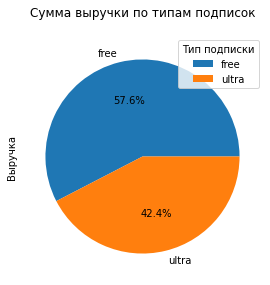

In [51]:
pivot_agreg.plot(kind='pie', subplots=True, autopct='%1.1f%%', title='Сумма выручки по типам подписок')

plt.ylabel('Выручка')
plt.legend(title='Тип подписки')
plt.tight_layout()
plt.show()

Пользователи с подпиской приносят 42.4 % выручки, пользователи без подписки 57.6%

#### Шаг 6. Проверка гипотез

#### 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Гипотеза: Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

Нулевая гипотеза (H0): Среднее время поездки для пользователей с подпиской равно среднему времени поездки для пользователей без подписки.

Альтернативная гипотеза (H1): Среднее время поездки для пользователей с подпиской больше среднего времени поездки для пользователей без подписки.

Уровень значимости (альфа): 0,05

In [52]:
alpha = 0.05

print('Среднее выборки без подписки', np.mean(no_subscription_data['duration']))
print('Среднее выборки с подпиской', np.mean(subscription_data['duration']))
results = st.ttest_ind(subscription_data['duration'],no_subscription_data['duration'], alternative = 'greater', equal_var = False)
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
    

Среднее выборки без подписки 17.390899896265562
Среднее выборки с подпиской 18.542016923076922
p-значение 5.6460360110885e-37
Отвергаем нулевую гипотезу


#### 6.2 Расстояние одной поездки в 
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров? Проверьте гипотезу и сделайте выводы.

Гипотеза: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
Нулевая гипотеза (H0): Среднее расстояние поездки для пользователей с подпиской больше или равно 3130 метров.
Альтернативная гипотеза (H1): Среднее расстояние поездки для пользователей с подпиской меньше 3130 метров.

In [53]:
ultra = subscription_data['distance']
ideal = 3130
results_ultra = st.ttest_1samp(ultra, ideal, alternative = 'less')
print('p-значение', results_ultra.pvalue)
print('Среднее', np.mean(ultra))
if results_ultra.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')



p-значение 0.0804637394157586
Среднее 3115.445430769231
Не отвергаем нулевую гипотезу


#### 6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Нулевая гипотеза (H0): Помесячная выручка от пользователей с подпиской не выше, чем выручка от пользователей без подписки.
Альтернативная гипотеза (H1): Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [54]:
ultra_rev = aggregated_data.loc[aggregated_data['subscription_type'] == 'ultra']
ultra_revn = ultra_rev['revenue']
free_rev = aggregated_data.loc[aggregated_data['subscription_type'] == 'free']
free_revn = free_rev['revenue']
results_new = st.ttest_ind(ultra_revn, free_revn, alternative = 'greater')
print('p-значение', results_new.pvalue)
print('Ср первой', np.mean(ultra_revn))
print('Ср второй', np.mean(free_revn))
if results_new.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 1.8164914860049708e-31
Ср первой 362.7260092653872
Ср второй 328.5754633715799
Отвергаем нулевую гипотезу


Это означает, что мы отвергаем нулевую гипотезу и можем сделать вывод о том, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

#### 6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Двухвыборочный t-тест для зависимых выборок.

Гипотеза: Среднее количество обращений в техподдержку после обновления серверов ниже, чем среднее количество обращений до обновления.
Нулевая гипотеза (H0): Среднее количество обращений в техподдержку после обновления серверов равно среднему количеству обращений до обновления.
Альтернативная гипотеза (H1): Среднее количество обращений в техподдержку после обновления серверов ниже, чем среднее количество обращений до обновления.

Для проверки гипотезы о том, что количество обращений в техподдержку после обновления серверов значимо снизилось, нам необходимо провести парный t-тест(ttest_rel). Если p-value ниже 0.05 то количество обращений в техподдержку до и после обновления серверов, и среднее количество обращений после обновления стало ниже. В другом случае количество обращений до и после обновления серверов не изменилось.

#### Шаг 7. Распределения


### Вывод:
Основную выручку приносят пользователи без подписки, компании стоит придумать еще несколько продуктов( тарифов) для привлечения людей к плкупке подписки ведь выручка людей без подписки составляет 2233656., что 57.6% общей выручки. Также меня смутило то, что в Пятигорске чаще пользуются самокатами нежели в Москве(Город пробов), возможно компания делает недостаточный упор на рекламу и привлечение пользоватлей. Возможно это связано с тем, что данные предоставлены за 2021 год. Но с новыми правиами, что каждый электросамокат должен иметь номер, выручка за 2023 год упала.
Среднее расстояние одной поездки для пользователей с подпиской не превышает 3130 метров.
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.
Для проверки этих гипотез использовались различные статистические тесты, включая t-тест и двухвыборочный t-тест для независимых выборок.

#### Полученные результаты позволяют сделать следующие рекомендации продуктовой команде сервиса:

Внедрение акций и программ лояльности, ориентированных на привлечение новых подписчиков.
Разработка новых маршрутов и предложений для пользователей с подпиской, которые стимулируют их к более активному использованию сервиса.
